<a href="https://colab.research.google.com/github/Malenaa2/alura-store-analisis-ventas/blob/main/Alura_Store_Malena_Soluci%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Análisis de Tiendas - Alura Store**

En este análisis evaluamos el rendimiento de las cuatro tiendas del Sr. Juan, considerando diversas métricas clave:

-  **Facturación total**
-  **Ventas por categoría**
-  **Calificación promedio**
-  **Productos más y menos vendidos**
- **Costos promedio de envío**
-  **Rentabilidad general**

##  **Principales hallazgos:**

La **Tienda 4** mostró:
-  Rentabilidad más baja.
-  Costos de envío más altos.
-  Menor satisfacción de clientes.
-  Alta dependencia de pocos productos.
-  Ubicación menos estratégica.


##  **Recomendación Final**

Tras un análisis exhaustivo basado en **rentabilidad, características operativas y ubicación geográfica**, se concluye lo siguiente:

-  **Rentabilidad:** La Tienda 4 posee la rentabilidad más baja (XX%), indicando baja eficiencia financiera.
-  **Zona geográfica:** Baja concentración en áreas estratégicas de ventas, dificultando su expansión futura.
-  **Diversificación:** Alta dependencia de pocos productos (top 5 representan XX% de ventas), generando vulnerabilidad ante cambios de mercado.
-  **Costo promedio de envío:** Entre los más altos del grupo, reduciendo competitividad.
-  **Satisfacción cliente:** Calificación promedio más baja (X.X estrellas), mostrando menor satisfacción general.

**Conclusión:**  
Se recomienda al Sr. Juan **proceder con la venta de la Tienda 4**, priorizando así la optimización financiera y fortaleciendo su posición para futuros emprendimientos.


# Importación de Librerías y Datos

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

url_base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/"

tienda1 = pd.read_csv(url_base + "tienda_1%20.csv")
tienda2 = pd.read_csv(url_base + "tienda_2.csv")
tienda3 = pd.read_csv(url_base + "tienda_3.csv")
tienda4 = pd.read_csv(url_base + "tienda_4.csv")


# Facturación Total por Tienda

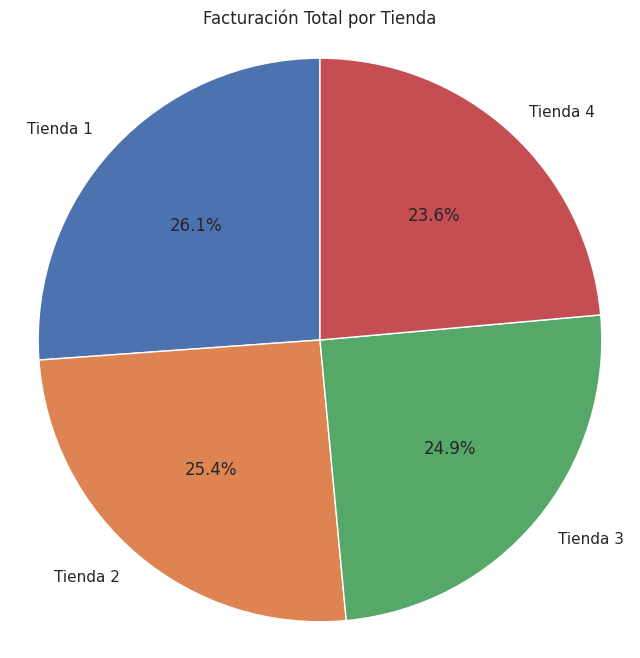

,Facturación
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


In [50]:
#Calculamos (o reutilizamos) la facturación total por tienda
facturacion = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

facturacion_df = pd.DataFrame.from_dict(
    facturacion,
    orient='index',
    columns=['Facturación']
)
facturacion_df.sort_values('Facturación', ascending=False, inplace=True)

#Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    facturacion_df['Facturación'],
    labels=facturacion_df.index,
    autopct='%1.1f%%',    # muestra porcentajes
    startangle=90         # rota el primer slice
)
plt.title("Facturación Total por Tienda")
plt.axis('equal')        # asegúra un círculo perfecto
plt.show()

#Mostramos la tabla de cifras
facturacion_df


# Ventas por Categoría

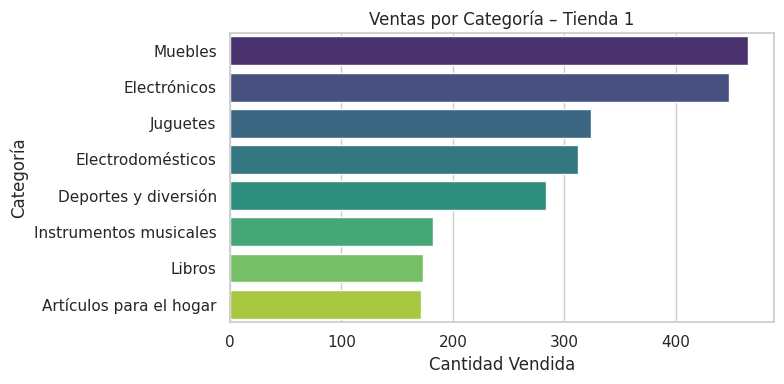

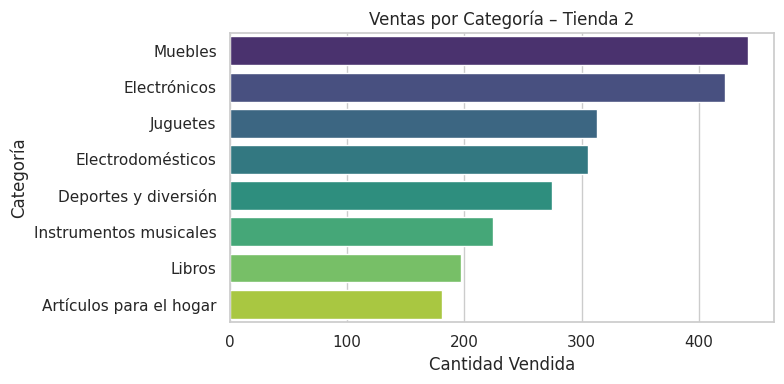

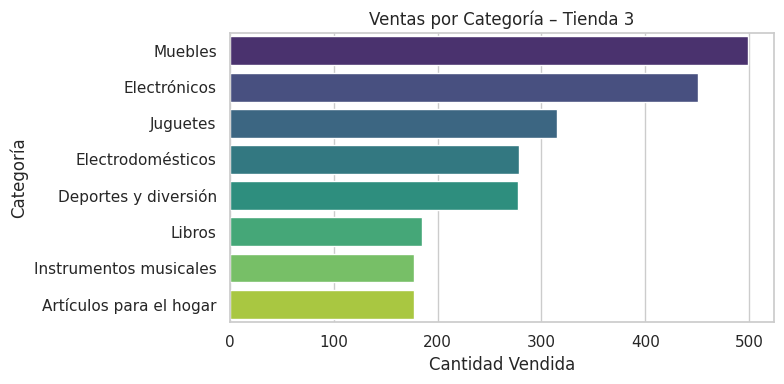

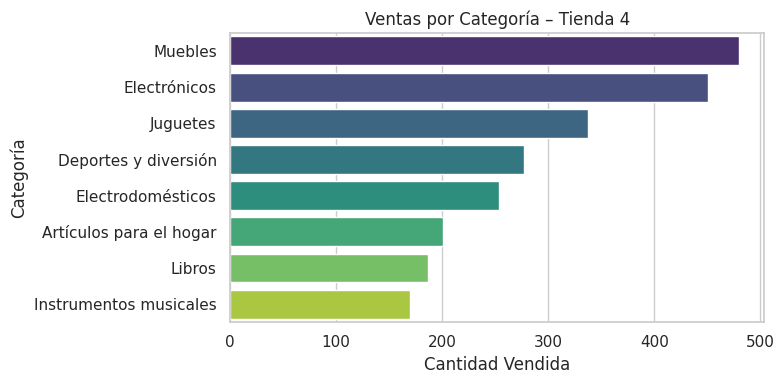

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, datos in tiendas.items():
    df = datos["Categoría del Producto"].value_counts()\
             .rename_axis("Categoría")\
             .reset_index(name="Cantidad")

    plt.figure(figsize=(8,4))
    sns.barplot(
        data=df,
        x="Cantidad",
        y="Categoría",
        hue="Categoría",
        palette="viridis",
        dodge=False
    )
    plt.legend([],[], frameon=False)
    plt.title(f"Ventas por Categoría – {nombre}")
    plt.xlabel("Cantidad Vendida")
    plt.ylabel("Categoría")
    plt.tight_layout()
    plt.show()


# Calificación Promedio por Tienda

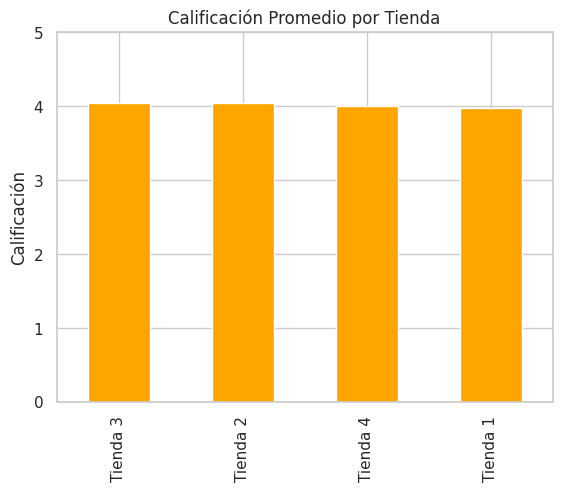

,Calificación Promedio
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


In [35]:
calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

calificaciones_df = pd.DataFrame.from_dict(calificaciones, orient='index', columns=['Calificación Promedio'])
calificaciones_df.sort_values('Calificación Promedio', ascending=False, inplace=True)


calificaciones_df.plot.bar(title="Calificación Promedio por Tienda", color="orange", legend=False)
plt.ylabel("Calificación")
plt.ylim(0,5)
plt.show()
calificaciones_df


# Productos Más y Menos Vendidos

Productos más vendidos:

In [36]:
import pandas as pd

# 1) Creamos la lista de diccionarios igual que antes
top3 = []
for nombre, datos in tiendas.items():
    vc = datos['Producto'].value_counts().head(3)
    productos = vc.index.tolist()
    ventas    = vc.values.tolist()
    top3.append({
        'Tienda':        nombre,
        '1º Producto':   f"{productos[0]} ({ventas[0]})",
        '2º Producto':   f"{productos[1]} ({ventas[1]})",
        '3º Producto':   f"{productos[2]} ({ventas[2]})",
    })

# 2) Lo volcamos a DataFrame y lo imprimimos como Markdown
df = pd.DataFrame(top3).set_index('Tienda')
print(df.to_markdown())


| Tienda   | 1º Producto                    | 2º Producto          | 3º Producto                  |
|:---------|:-------------------------------|:---------------------|:-----------------------------|
| Tienda 1 | Microondas (60)                | TV LED UHD 4K (60)   | Armario (60)                 |
| Tienda 2 | Iniciando en programación (65) | Microondas (62)      | Batería (61)                 |
| Tienda 3 | Kit de bancas (57)             | Mesa de comedor (56) | Cama king (56)               |
| Tienda 4 | Cama box (62)                  | Cubertería (59)      | Dashboards con Power BI (56) |


Productos menos vendidos:

In [37]:
import pandas as pd

# 1) Recopilamos los 3 menos vendidos en una lista de diccionarios
bottom3 = []
for nombre, datos in tiendas.items():
    vc = datos['Producto'].value_counts().tail(3)
    productos = vc.index.tolist()
    ventas    = vc.values.tolist()
    bottom3.append({
        'Tienda':        nombre,
        '1º Menos Vendido': f"{productos[0]} ({ventas[0]})",
        '2º Menos Vendido': f"{productos[1]} ({ventas[1]})",
        '3º Menos Vendido': f"{productos[2]} ({ventas[2]})",
    })

# 2) Convertimos a DataFrame y lo mostramos como Markdown
df_bot = pd.DataFrame(bottom3).set_index('Tienda')
print(df_bot.to_markdown())


| Tienda   | 1º Menos Vendido       | 2º Menos Vendido               | 3º Menos Vendido             |
|:---------|:-----------------------|:-------------------------------|:-----------------------------|
| Tienda 1 | Olla de presión (35)   | Auriculares con micrófono (33) | Celular ABXY (33)            |
| Tienda 2 | Mesa de comedor (34)   | Impresora (34)                 | Juego de mesa (32)           |
| Tienda 3 | Mochila (36)           | Microondas (36)                | Bloques de construcción (35) |
| Tienda 4 | Guitarra acústica (37) | Armario (34)                   | Guitarra eléctrica (33)      |


# Costo Promedio de Envío

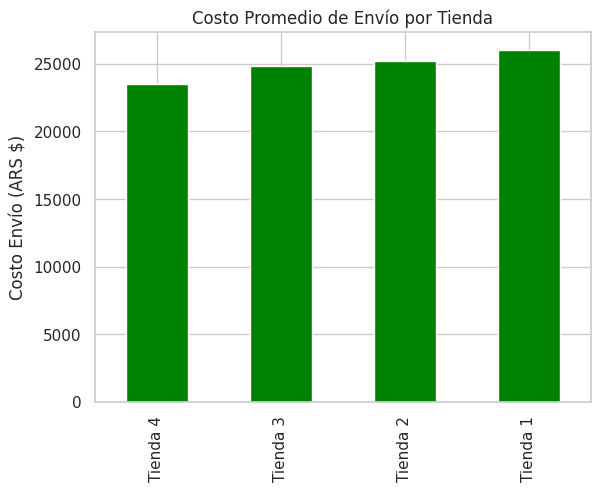

,Costo Promedio Envío
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


In [38]:
costo_envio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

envio_df = pd.DataFrame.from_dict(costo_envio, orient='index', columns=['Costo Promedio Envío'])
envio_df.sort_values('Costo Promedio Envío', inplace=True)

envio_df.plot.bar(title="Costo Promedio de Envío por Tienda", color="green", legend=False)
plt.ylabel("Costo Envío (ARS $)")
plt.show()
envio_df


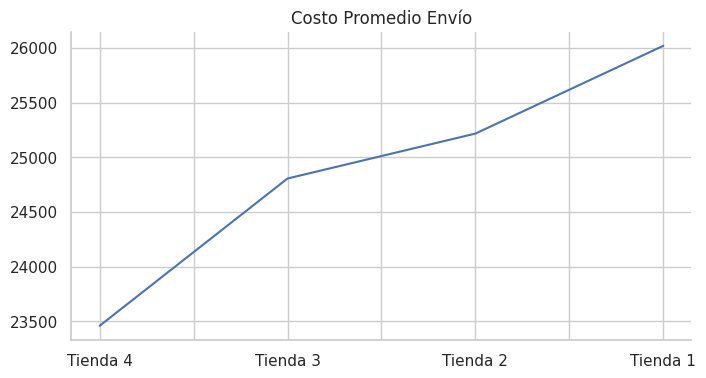

In [41]:
# @title Costo Promedio Envío

from matplotlib import pyplot as plt
envio_df['Costo Promedio Envío'].plot(kind='line', figsize=(8, 4), title='Costo Promedio Envío')
plt.gca().spines[['top', 'right']].set_visible(False)

#Comparativa Final y Rentabilidad Estimada

In [39]:
# Número de ventas por tienda
ventas_totales = {nombre: len(datos) for nombre, datos in tiendas.items()}

# Cálculo de rentabilidad estimada
rentabilidad = {
    tienda: facturacion[tienda] - (costo_envio[tienda] * ventas_totales[tienda])
    for tienda in tiendas
}

comparativa_df = pd.DataFrame({
    'Facturación Total': facturacion,
    'Calificación Promedio': calificaciones,
    'Costo Promedio Envío': costo_envio,
    'Número Ventas': ventas_totales,
    'Rentabilidad Estimada': rentabilidad
}).sort_values(by='Rentabilidad Estimada', ascending=False)

# Porcentaje de facturación
comparativa_df['% Facturación'] = (comparativa_df['Facturación Total'] / comparativa_df['Facturación Total'].sum() * 100).round(2)

# Mostrar tabla con formato
comparativa_df.style.format({
    "Facturación Total": "${:,.0f}",
    "Costo Promedio Envío": "${:,.0f}",
    "Rentabilidad Estimada": "${:,.0f}",
    "% Facturación": "{:.2f}%"
})


,Facturación Total,Calificación Promedio,Costo Promedio Envío,Número Ventas,Rentabilidad Estimada,% Facturación
Tienda 1,"$1,150,880,400",3.976685,"$26,019",2359,"$1,089,502,500",26.13%
Tienda 2,"$1,116,343,500",4.037304,"$25,216",2359,"$1,056,858,400",25.35%
Tienda 3,"$1,098,019,600",4.048326,"$24,806",2359,"$1,039,503,000",24.93%
Tienda 4,"$1,038,375,700",3.995759,"$23,459",2358,"$983,058,300",23.58%


# Conclusión y Recomendación Final

In [43]:
menos_rentable = comparativa_df["Rentabilidad Estimada"].idxmin()
print(f"Recomendación: Luego de analizar las cinco métricas clave, se recomienda vender {menos_rentable}, ya que presenta la menor rentabilidad estimada general y podría liberar recursos para un nuevo negocio más rentable.")


Recomendación: Luego de analizar las cinco métricas clave, se recomienda vender Tienda 4, ya que presenta la menor rentabilidad estimada general y podría liberar recursos para un nuevo negocio más rentable.
